In [34]:
import os
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from PIL import Image

In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
def make_dir():
    image_dir = 'MNIST_Out_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
def save_decod_img(img, epoch):
    img = img.view(img.size(0), 1, 28, 28)
    save_image(img, './MNIST_Out_Images/Autoencoder_image{}.png'.format(epoch))

device = get_device()
model.to(device)
make_dir()

In [35]:
Epochs = 20
Lr_Rate = 1e-3
Batch_Size = 128

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [36]:
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=Batch_Size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=Batch_Size, shuffle=True)

In [37]:
print(train_set)
print(train_set.classes)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [38]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), 
            nn.Linear(64, 12), 
            nn.ReLU(True),
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 28 * 28), 
            nn.Tanh())

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

        # self.encoder = nn.Sequential(
        #     nn.Linear(28 * 28, 128),
        #     nn.ReLU(True),
        #     nn.Linear(128, 64),
        #     nn.ReLU(True), 
        #     nn.Linear(64, 12), 
        #     nn.ReLU(True),
        #     nn.Linear(12, 3))
        # self.decoder = nn.Sequential(
        #     nn.Linear(3, 12),
        #     nn.ReLU(True),
        #     nn.Linear(12, 64),
        #     nn.ReLU(True),
        #     nn.Linear(64, 128),
        #     nn.ReLU(True), 
        #     nn.Linear(128, 28 * 28), 
        #     nn.Tanh())


In [39]:
model = Autoencoder()
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Tanh()
  )
)


LOSS and Optimization

In [40]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=Lr_Rate)

(d) Write a training loop over epochs and over the batches of the
train set and calculate the average loss between the
reconstructed image and the input image.

In [41]:
def training(model, train_loader, Epochs):
    train_loss = []
    for epoch in range(Epochs):
        running_loss = 0.0
        for data in train_loader:
            img, _ = data
            img = img.to(device)
            img = img.view(img.size(0), -1)
            optimizer.zero_grad()
            outputs = model(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss = running_loss / len(train_loader)               #Avg loss
        train_loss.append(loss)
        print('Epoch {} of {},Avg Train Loss: {:.3f}'.format(
            epoch+1, Epochs, loss))

        if epoch % 5 == 0:
            save_decod_img(outputs.cpu().data, epoch)

    return train_loss

In [43]:
train_loss = training(model, train_loader, Epochs)


Epoch 1 of 20,Avg Train Loss: 0.248
Epoch 2 of 20,Avg Train Loss: 0.176
Epoch 3 of 20,Avg Train Loss: 0.163
Epoch 4 of 20,Avg Train Loss: 0.157
Epoch 5 of 20,Avg Train Loss: 0.152
Epoch 6 of 20,Avg Train Loss: 0.149
Epoch 7 of 20,Avg Train Loss: 0.146
Epoch 8 of 20,Avg Train Loss: 0.144
Epoch 9 of 20,Avg Train Loss: 0.142
Epoch 10 of 20,Avg Train Loss: 0.140
Epoch 11 of 20,Avg Train Loss: 0.139
Epoch 12 of 20,Avg Train Loss: 0.138
Epoch 13 of 20,Avg Train Loss: 0.136
Epoch 14 of 20,Avg Train Loss: 0.135
Epoch 15 of 20,Avg Train Loss: 0.134
Epoch 16 of 20,Avg Train Loss: 0.134
Epoch 17 of 20,Avg Train Loss: 0.133
Epoch 18 of 20,Avg Train Loss: 0.132
Epoch 19 of 20,Avg Train Loss: 0.132
Epoch 20 of 20,Avg Train Loss: 0.131


In [44]:
train_loss

[0.2478702518858635,
 0.17593195163873213,
 0.16294213411396247,
 0.15687486599249117,
 0.1524680725483498,
 0.14887556586184228,
 0.14593838886030194,
 0.143626293743343,
 0.14177779910533922,
 0.14016166462827084,
 0.1386155150592454,
 0.13756399674773978,
 0.13640780789829265,
 0.13548056013993362,
 0.1344523025410516,
 0.13374365036929847,
 0.13303037940947485,
 0.1323060124222912,
 0.13180824370780733,
 0.1310923646635084]

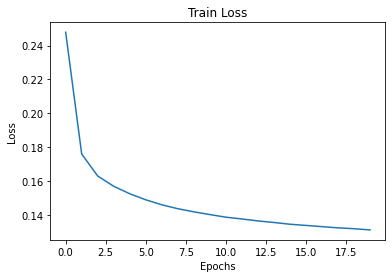

In [45]:
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_mnist_loss.png')


In [46]:
def testing(model, test_loader):
     for batch in test_loader:
        img, _ = batch
        img = img.to(device)
        inputs = img.view(img.size(0), 1, 28, 28).cpu().data
        img = img.view(img.size(0), -1)
        outputs = model(img)
        outputs = outputs.view(outputs.size(0), 1, 28, 28).cpu().data
        save_image(outputs, 'MNIST_reconstruction.png')
        save_image(inputs, 'MNIST_original.png')
        break

In [47]:
testing(model, test_loader)


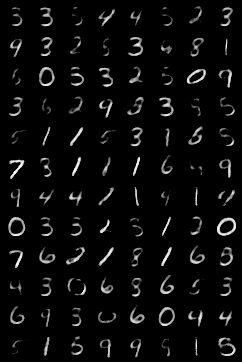

In [18]:
Image.open('/content/MNIST_Out_Images/Autoencoder_image10.png')

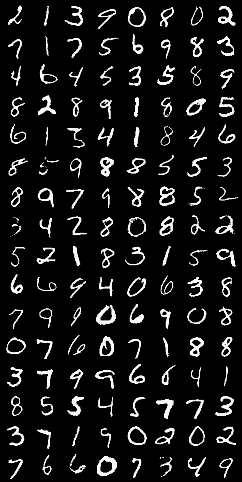

In [49]:
Image.open('/content/MNIST_original.png')

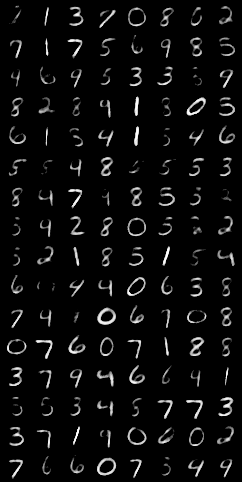

In [48]:
Image.open('/content/MNIST_reconstruction.png')

**1) Perform the experiment using different optimizers like Adam,
RMSProp, SGD with momentum, SGD without momentum** 

**RMSProp**

In [27]:
optimizer = optim.RMSprop(model.parameters(), lr=Lr_Rate)
train_loss = training(model, train_loader, Epochs)



Epoch 1 of 20,Avg Train Loss: 0.234
Epoch 2 of 20,Avg Train Loss: 0.179
Epoch 3 of 20,Avg Train Loss: 0.164
Epoch 4 of 20,Avg Train Loss: 0.157
Epoch 5 of 20,Avg Train Loss: 0.152
Epoch 6 of 20,Avg Train Loss: 0.148
Epoch 7 of 20,Avg Train Loss: 0.145
Epoch 8 of 20,Avg Train Loss: 0.143
Epoch 9 of 20,Avg Train Loss: 0.141
Epoch 10 of 20,Avg Train Loss: 0.139
Epoch 11 of 20,Avg Train Loss: 0.138
Epoch 12 of 20,Avg Train Loss: 0.137
Epoch 13 of 20,Avg Train Loss: 0.136
Epoch 14 of 20,Avg Train Loss: 0.135
Epoch 15 of 20,Avg Train Loss: 0.134
Epoch 16 of 20,Avg Train Loss: 0.133
Epoch 17 of 20,Avg Train Loss: 0.132
Epoch 18 of 20,Avg Train Loss: 0.132
Epoch 19 of 20,Avg Train Loss: 0.131
Epoch 20 of 20,Avg Train Loss: 0.130


**SDG**
With and Without Momentum

In [33]:

optimizer = optim.SGD(model.parameters(), lr=Lr_Rate, momentum=0.9)
train_loss = training(model, train_loader, Epochs)


Epoch 1 of 20,Avg Train Loss: 0.914
Epoch 2 of 20,Avg Train Loss: 0.882
Epoch 3 of 20,Avg Train Loss: 0.834
Epoch 4 of 20,Avg Train Loss: 0.716
Epoch 5 of 20,Avg Train Loss: 0.382
Epoch 6 of 20,Avg Train Loss: 0.279
Epoch 7 of 20,Avg Train Loss: 0.272
Epoch 8 of 20,Avg Train Loss: 0.270
Epoch 9 of 20,Avg Train Loss: 0.269
Epoch 10 of 20,Avg Train Loss: 0.266
Epoch 11 of 20,Avg Train Loss: 0.265
Epoch 12 of 20,Avg Train Loss: 0.264
Epoch 13 of 20,Avg Train Loss: 0.263
Epoch 14 of 20,Avg Train Loss: 0.262
Epoch 15 of 20,Avg Train Loss: 0.261
Epoch 16 of 20,Avg Train Loss: 0.261
Epoch 17 of 20,Avg Train Loss: 0.260
Epoch 18 of 20,Avg Train Loss: 0.260
Epoch 19 of 20,Avg Train Loss: 0.259
Epoch 20 of 20,Avg Train Loss: 0.259


In [50]:
optimizer = optim.SGD(model.parameters(), lr=Lr_Rate, momentum=0)
train_loss = training(model, train_loader, Epochs)


Epoch 1 of 20,Avg Train Loss: 0.130
Epoch 2 of 20,Avg Train Loss: 0.129
Epoch 3 of 20,Avg Train Loss: 0.129
Epoch 4 of 20,Avg Train Loss: 0.129
Epoch 5 of 20,Avg Train Loss: 0.129
Epoch 6 of 20,Avg Train Loss: 0.129
Epoch 7 of 20,Avg Train Loss: 0.129
Epoch 8 of 20,Avg Train Loss: 0.129
Epoch 9 of 20,Avg Train Loss: 0.129
Epoch 10 of 20,Avg Train Loss: 0.129
Epoch 11 of 20,Avg Train Loss: 0.129
Epoch 12 of 20,Avg Train Loss: 0.129
Epoch 13 of 20,Avg Train Loss: 0.129
Epoch 14 of 20,Avg Train Loss: 0.129
Epoch 15 of 20,Avg Train Loss: 0.129
Epoch 16 of 20,Avg Train Loss: 0.129
Epoch 17 of 20,Avg Train Loss: 0.129
Epoch 18 of 20,Avg Train Loss: 0.129
Epoch 19 of 20,Avg Train Loss: 0.128
Epoch 20 of 20,Avg Train Loss: 0.128
